In [2]:
import numpy as np
import cv2
import sys 

import matplotlib.pyplot as plt
import os

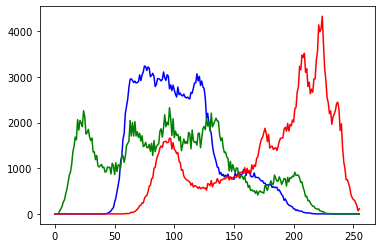

In [15]:
src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_COLOR)

# cv2.calcHist()
# images : 입체영상 리스트(리스트 형식으로 입력)
# channels : 채널리스트, 3 채널의 경우 [0, 1, 2]
# mask : 마스크 영상입력, 영상전체는 None으로 지정
# histSize : 히스토그램 빈의 크기
# range : 히스토그램 min, max값
# hist : 계산된 히스토그램
# accumulate : 기존의 히스토그림을 누적할 경우 True
hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])

#print(hist)
#print(hist.shape)

cv2.imshow('src', src)
plt.plot(hist_b, c = 'b', label = 'blue channel')
plt.plot(hist_g, c = 'g', label = 'green channel')
plt.plot(hist_r, c = 'r', label = 'red channel')

plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
def getGrayHistImage(hist):
    
    # 비어있는 하얀 창 생성, 200, 256 (h, w) numpy 좌표계로 생성
    imgHist = np.full((200, 256), 255, np.uint8)

    print(imgHist.shape) # (200, 256)
    histMax = np.max(hist)

    
    for x in range(256):
        # x가 1씩 증가하므로, 수학 좌표계로는 (x, 0)
        # 그러나 opencv에서는 왼쪽 위가 (0, 0)이기 때문에 
        # imgae height값(200)이 수학 좌표의 0이 된다.   
        pt1 = (x, 200) 
        # y를 200 등분한다. histmax로 나눴으나,
        # y가 200보다 클 수 없다.
        pt2 = (x, 200 - int(hist[x, 0]*200/histMax)) 
        cv2.line(imgHist, pt1, pt2, 0)  # 직선으로 선이 이어진다.
        
    return imgHist
        
# 사진 크기는 256 * 256 (w, h)
src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
#print(hist)
print(hist.shape)  # (256, 1) 크기
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)



cv2.waitKey()
cv2.destroyAllWindows()

(256, 1)
(200, 256)
